In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


sns.set(style="whitegrid")


In [2]:
df = pd.read_csv('creditcard.csv')

In [3]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
print("Shape of data:", df.shape)

Shape of data: (284807, 31)


In [5]:
print("\nColumn info:")
print(df.info())


Column info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 

In [6]:
print("Missing values in each column:\n")
print(df.isnull().sum())

Missing values in each column:

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


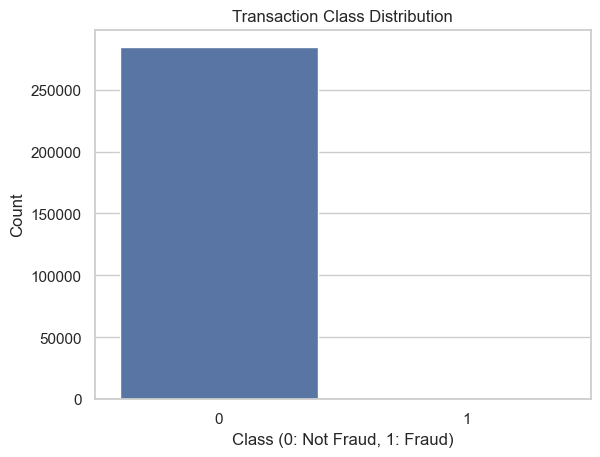

Class distribution (%):
 0    99.827251
1     0.172749
Name: Class, dtype: float64


In [7]:
# Visualize class distribution
sns.countplot(x='Class', data=df)
plt.title('Transaction Class Distribution')
plt.xlabel('Class (0: Not Fraud, 1: Fraud)')
plt.ylabel('Count')
plt.show()

# Print class percentages
fraud_percent = df['Class'].value_counts(normalize=True) * 100
print("Class distribution (%):\n", fraud_percent)


In [18]:
#Feature Engineering


In [8]:
from sklearn.preprocessing import StandardScaler

# Create scaled versions of 'Amount' and 'Time'
scaler = StandardScaler()
df['scaled_amount'] = scaler.fit_transform(df[['Amount']])
df['scaled_time'] = scaler.fit_transform(df[['Time']])

# Drop original 'Amount' and 'Time'
df.drop(['Amount', 'Time'], axis=1, inplace=True)

# Reorder columns: put scaled ones at the start
scaled_features = ['scaled_amount', 'scaled_time']
remaining_features = [col for col in df.columns if col not in scaled_features]
df = df[scaled_features + remaining_features]

# Preview the data
df.head()


,scaled_amount,scaled_time,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
0,0.244964,-1.996583,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0
1,-0.342475,-1.996583,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0
2,1.160686,-1.996562,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0
3,0.140534,-1.996562,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0
4,-0.073403,-1.996541,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0


In [16]:
#Anomaly Detection (Isolation Forest)


In [9]:
from sklearn.ensemble import IsolationForest
from sklearn.metrics import classification_report, confusion_matrix

# Drop the label column for unsupervised detection
X_unlabeled = df.drop(['Class'], axis=1)

# Initialize Isolation Forest
iso_forest = IsolationForest(contamination=0.0017, random_state=42)
df['anomaly_score'] = iso_forest.fit_predict(X_unlabeled)

# Convert to 0 (normal) and 1 (anomaly) to match fraud labels
df['anomaly_label'] = df['anomaly_score'].map({1: 0, -1: 1})


c:\users\nikhitha\appdata\local\programs\python\python37\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  "X does not have valid feature names, but"


In [11]:
# Compare anomaly detection to actual labels
print("Confusion Matrix:")
print(confusion_matrix(df['Class'], df['anomaly_label']))

print("\nClassification Report:")
print(classification_report(df['Class'], df['anomaly_label']))


Confusion Matrix:
[[283969    346]
 [   353    139]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    284315
           1       0.29      0.28      0.28       492

    accuracy                           1.00    284807
   macro avg       0.64      0.64      0.64    284807
weighted avg       1.00      1.00      1.00    284807



In [17]:
#Train Supervised ML Model (Random Forest)

In [12]:
from sklearn.model_selection import train_test_split

# Drop anomaly columns to avoid leakage
X = df.drop(['Class', 'anomaly_score', 'anomaly_label'], axis=1)
y = df['Class']

# Stratify ensures fraud cases are balanced across train/test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, stratify=y, random_state=42
)

print("Train set size:", X_train.shape)
print("Test set size:", X_test.shape)


Train set size: (199364, 30)
Test set size: (85443, 30)


In [13]:
from sklearn.ensemble import RandomForestClassifier

# Initialize and train model
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
rf_clf.fit(X_train, y_train)

# Make predictions
y_pred = rf_clf.predict(X_test)


In [ ]:
#Evaluate ML Model

In [14]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# Confusion Matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Classification Metrics
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# ROC-AUC Score
roc_score = roc_auc_score(y_test, y_pred)
print(f"\nROC-AUC Score: {roc_score:.4f}")


Confusion Matrix:
[[85290     5]
 [   35   113]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.96      0.76      0.85       148

    accuracy                           1.00     85443
   macro avg       0.98      0.88      0.92     85443
weighted avg       1.00      1.00      1.00     85443


ROC-AUC Score: 0.8817


In [ ]:
#Real-Time Fraud Detection Simulation

In [15]:
import time

# Simulate real-time prediction for first 10 test transactions
print("Real-Time Fraud Prediction Simulation:\n")

for i in range(10):
    transaction = X_test.iloc[i:i+1]
    prediction = rf_clf.predict(transaction)[0]
    
    status = "⚠️ FRAUD DETECTED" if prediction == 1 else "✅ Legitimate"
    print(f"Transaction {i+1}: {status}")
    
    # Simulate time delay (optional)
    time.sleep(0.5)  # Pause for 0.5 seconds


Real-Time Fraud Prediction Simulation:

Transaction 1: ✅ Legitimate
Transaction 2: ✅ Legitimate
Transaction 3: ✅ Legitimate
Transaction 4: ✅ Legitimate
Transaction 5: ✅ Legitimate
Transaction 6: ✅ Legitimate
Transaction 7: ✅ Legitimate
Transaction 8: ✅ Legitimate
Transaction 9: ✅ Legitimate
Transaction 10: ✅ Legitimate


## 📈 Scalability Strategy

1. **Large Dataset Handling**
   - Use Dask or PySpark to scale data processing.

2. **Real-Time Scoring**
   - Deploy model via Flask/FastAPI.
   - Connect to real-time pipelines (Kafka, AWS Kinesis).

3. **Model Deployment**
   - Use Docker + Kubernetes for scalable serving.
   - Store model with `joblib` or `pickle`.

4. **Monitoring**
   - Add logging, alerts, and monitoring (Prometheus + Grafana).

5. **Retraining Pipeline**
   - Automate periodic retraining using MLflow or Airflow.
